## <font color=darkcyan> Probabilités numériques: Algorithme EM sur des chaines de Markov à données cachés (The Baum Welch Algorithm)</font>

Le but de ce projet est d'implémenter l'algorithme EM sur un modèle probabiliste ou les données obervables suivent des lois gaussiennes sachant les données cachés et où ces données cachés sont une chaine de Markov. Notre but sera donc d'approcher les probabilités de transitions de la chaines de Markov, les moyennes et variances des loi gaussiennes selon les différents états de la chaine et enfin les probabilités de la loi initiale de la chaine.

#### <font color=darkorange>Définition formelle du problème</font>

Plus formellement, soit $\left( X_k \right)_{ 1 \leq k \leq n}$ une chaine de Markov discrètes à valeurs dans $\left(\{1,....,r\} \right)$ de matrice de transition $Q$ et de loi initiale $\nu$. On considère que cette chaîne est uniquement observée au travers
des variables $\left(Y_k \right)_{ 1 \leq k \leq n}$ indépendantes conditionnellement à $\left( X_k \right)_{ 1 \leq k \leq n}$ et telle que pour tout
$\ 0 \leq l \leq n$
, la loi de $Y_l$ sachant $\left( X_k \right)_{ 1 \leq k \leq n}$ suit une loi $\mathcal{N}(\mu_{x_l}, v_{x_l})$
.
Le paramètre inconnu est donc ici $θ = \{\mu_{1}, . . . , ,\mu_{r}, v_{1}, . . . ,v_{r}, Q, \nu\}$.
 

#### <font color=darkorange>  - Etape E de l'Algorithme </font>

- Dans l'étape E de l'algorithme, le but est de calculer la quantité intermédiaire de l'EM :

    $$Q(\theta, \theta^\prime) =  \mathbb{E}_{\theta '}[\log p_{\theta}(X_{0:n}, Y_{0:n})\mid Y_{0:n}]$$ 
    
    où $p_{\theta}$ est la densité du vecteur $(X_{0},...,X_{n},Y_{1},...,Y_{0})$. On peut commencer par écrire $\log p_{\theta}(X_{0:n}, Y_{0:n})$ en fonction des paramètres du problème.

    On sait que $\forall \theta$ et $\forall x_{0},..,x_{n},y_{0},..,y_{n} \in \mathbb{R}^{n+1} \times \{1,....,r\}^{n+1} $, on a  
    $$p_{\theta}(x_{0},..,x_{n},y_{0},..,y_{n}) = p_{\theta}(y_{0},..,y_{n} \mid x_{0},..,x_{n})  f^X_{\theta}(x_{0},..,x_{n})$$
     ou $f^X$ est la densité du vecteur $(X_{0},...,X_{n})$ .

    Or sachant $(X_{0},...,X_{n})$,  $(Y_{0},...,Y_{n})$ est un vecteur de variables aléatoire indépendantes, respectivement de loi $\mathcal{N}(\mu_{x_k}, v_{x_k}), \forall k \in \{ 0, \ldots, n \}$ donc :

    $$p_{\theta}(y_{0},..,y_{n},\mid x_{0},..,x_{n}) = \prod_{k=0}^n \frac{1}{\sqrt{2\pi v_{y_i}}} \exp\left(-\frac{(y_k-\mu_{x_i})^2}{2v_{x_k}}\right) $$

    On a aussi
     
    $$f^Y_{\theta}(x_{0},..,x_{n}) = \nu(x_{0})  \prod_{k=0}^{n-1} q_{x_k,x_{k+1}}$$

    On a donc 
    
    $$p_{\theta}(x_{0},..,x_{n},y_{0},..,y_{n}) = \nu(x_{0})\prod_{k=0}^n \frac{1}{\sqrt{2\pi v_{x_k}}} \exp\left(-\frac{(y_k-\mu_{x_k})^2}{2v_{x_k}}\right) \times \prod_{k=0}^{n-1} q_{x_k,x_{k+1}}$$

    donc
    
     $$\log p_{\theta}(X_{0:n}, Y_{0:n}) = \log(\nu(X_0)) + \sum_{k=0}^n \log\left(\frac{1}{\sqrt{2\pi v_{X_k}}}\right) - \sum_{k=0}^n \frac{(Y_k - \mu_{X_k})^2}{2v_{X_k}} + \sum_{k=0}^{n-1} \log(q_{X_k} q_{X_{k+1}})$$

    Enfin on touve 
    
    $$Q(\theta, \theta^\prime) = \mathbb{E}_{\theta '}[\log p_{\theta}(X_{0:n}, Y_{0:n})\mid Y_{0:n} = y_{0:n} ] $$ 
    
    $$ =\mathbb{E}_{\theta '}[\log(\nu^{\theta}(X_0)) + \sum_{k=0}^n \log\left(\frac{1}{\sqrt{2\pi v_{X_k}}}\right) - \sum_{k=0}^n \frac{(y_i - \mu^{\theta}_{X_k})^2}{2v^{\theta}_{X_k}} + \sum_{k=0}^{n-1} \log(q^{\theta}_{X_k X_{k+1}}) \mid Y_{0:n} = y_{0:n} ]$$
    
    $$=\mathbb{E}_{\theta '}[\log(\nu^{\theta}(X_0)) \mid Y_{0:n} = y_{0:n}] + \mathbb{E}_{\theta '}[\sum_{k=0}^n \log\left(\frac{1}{\sqrt{2\pi \nu^\theta_{X_k}}}\right) - \sum_{k=0}^n \frac{(y_k - \mu^{\theta}_{X_k})^2}{2v^{\theta}_{X_k}}\mid Y_{0:n} = y_{0:n}] + \mathbb{E}_{\theta '}[\sum_{k=0}^{n-1} \log(q^{\theta}_{X_k X_{k+1}})\mid Y_{0:n} = y_{0:n}]$$
     
    $$= \sum_{i=1}^{r} \log(v^{\theta}(i)) P_{\theta '}(X_0=i \mid Y_{0:n} = y_{0:n}) - 
     \sum_{i=0}^r\sum_{k=0}^n (\log\left(\frac{1}{\sqrt{2\pi \nu^\theta_{i}}}\right) - \frac{(y_k - \mu^{\theta}_{i})^2}{2v^{\theta}_{i}}) P_{\theta '}(X_k=i \mid Y_{0:n} = y_{0:n}) + \sum_{i=0}^r \sum_{j=0}^r \sum_{k=0}^{n-1} \log(q^{\theta}_{i j}) P_{\theta '}(X_k=i, X_{k+1}=j \mid Y_{0:n} = y_{0:n})$$ 



    $\underline{Conclusion}$ : 


    $$\boxed{ \mathbb{E}_{\theta '}[\log p_{\theta}(X_{0:n}, Y_{0:n})\mid Y_{0:n} = y_{0:n} ]= \sum_{i=1}^{r} \log(\nu^{\theta}(i)) \omega^{\theta\prime}_{0}(i) - 
    \sum_{i=0}^r\sum_{k=0}^n \left(\log\left(\frac{1}{\sqrt{2\pi v^\theta_{i}}}\right) - \frac{(y_k - \mu^{\theta}_{i})^2}{2v^{\theta}_{i}} \right) \omega^{\theta\prime}_{k}(i)+ \sum_{i=0}^r \sum_{j=0}^r \sum_{k=0}^{n-1} \log(q^{\theta}_{i j}) \omega^{\theta\prime}_{k,k+1}(i,j)} $$ 
    

#### <font color=darkorange>  - Etape M de l'Algorithme </font>

- Dans l'étape M de l'algorithme, le but est de maximiser la quatité intermédiaire :
 

    En déterminant où s'annulent les dérivées partiels et grâce aux multiplicateurs de lagranges, on obtient la mise à jour :
    
    
    - $\forall i,j \in \{1,...,r\}^2, \hspace{1.5cm} \boxed{q^\theta_{ij} = \frac{\sum_{k=0}^n \omega_{k,k+1}^{\theta'}(i,j)}{\sum_{k=0}^n \omega_k^{\theta'}(i)}}$

    - $\forall i \in \{1,...,r\}, \hspace{2cm} \boxed{\mu^\theta_{i} = \frac{\sum_{k=0}^n y_k w_{k}^{\theta'}(i)}{\sum_{k=0}^n w_{k}^{\theta'}(i)}}$
    
    $\hspace{5cm} \boxed{v^\theta_{i} = \frac{\sum_{k=0}^n (y_k - \mu^\theta_i)^2 \omega ^{\theta^{old}}_{k}(i)}{\sum_{k=0}^n w_{k}^{\theta'}(i)}}$

    $\hspace{5cm} \boxed{\nu^\theta_{i} = \omega ^{\theta^{old}}_{0}(i)}$

    Maintenant que nous avons nos mises à jours, il nous faut des méthodes pour calculer ou approcher les probabilités $\omega_{k,k+1}^{\theta'}(i,j)$ et 
    $\omega_k^{\theta'}(i)$.
    Il existe des algorithmes capables d'approchers ces valeurs :
    

    $$\omega_{k}^{\theta'}(i)=P_{\theta '}(X_k=i \mid Y_{0:n} = y_{0:n}) = \frac{ P_{\theta'}(X_k = i, Y_{0:n} = y_{0:n})}{P_{\theta'}(Y_{0:n} = y_{0:n})}$$



    $$\omega_{k,k+1}^{\theta'}(i,j)=P_{\theta '}(X_k=i, X_{k+1}=j \mid Y_{0:n} = y_{0:n}) = \frac{ P_{\theta'}(X_k = i, X_{k+1} = j, Y_{0:n} = y_{0:n})}{P_{\theta'}(Y_{0:n} = y_{0:n})}$$ 



    Pour estimiter ces quantités, on utilise des algorithmes récursifs appelé forward procedure et backward procedure.


   On introduit,$\forall t$ et $\forall i$, les quantités :
   
    $$\alpha_i(t) = \mathrm{P}(Y_1 = y_1, \ldots, Y_t = y_t, X_t = i | \theta)$$
    $$\beta_i(n) = P(Y_{t+1} = y_1, \ldots, Y_n = y_n,| X_t = i, \theta)$$
    $$ b_i(y_k)  = P(Y_k = y_k | X_k = i, \theta)$$
    
    
    Dans le cas discret cela fonctionnerait sauf que la quantité $b_i(y_k)$ donne toujours 0 car les observations sont continues. 
    Nous allons donc supposer par abus de langague que $b_i(y_k) = \int_{y_k-\epsilon}^{y_k+\epsilon} f_{Y_k|X_k = i}(y) \,dy$ pour epsilon assez petit envirion $\epsilon = 0.01$ .

   et on obtient finalement:

   $$\boxed{\omega_{k}^{\theta'}(i) = \frac{\alpha_i(k) \beta_i(k)}{\sum_{j=0}^r \alpha_j(k) \beta_j(k)}}$$

   $$\boxed{ \omega_{k,k+1}^{\theta'}(i,j) = \frac{\alpha_i(k) a_{ij} b_{{j}}(y_{k+1}) \beta_{j}(k+1)}{\sum_{i=1}^r \sum_{w=1}^r \alpha_i(k) a_{iw}  b_{{w}}(y_{k+1}) \beta_{w}(k+1)}}$$

   Pour calculer les quantité $\alpha_i(k)$ et  $\beta_i(k)$, on utilise les algorithmes récursif forward et backward suivant:

   - $\textit{Initalisation:} $

   $$ \forall i, \alpha_i(1) = \pi_i b_i(y_1)$$

   - $\textit{Récursion:}$

   $$\alpha_{i}(k+1) = \left[\sum_{j=1}^r \alpha_{j}(k)a_{ij}\right]b_i(y_{k+1})$$

   - $\textit{Initalisation:}$
   
  $$\forall i, \beta_i(n) = 1 $$

   - $\textit{Récursion:}$

   $$\beta_i(k) = \sum_{j=1}^r a_{ij}b_j(y_{k+1})\beta_{j}(k+1)$$

   On pose la matrice alpha de taille $n\times r$ tel que $a_{ki} = \alpha_{i}(k)$
   et la matrice b de taille $n\times r$ tel que $b_{ki} = b_{i}(k)$

   Par ailleurs on a besoin de ces initalisations pour que la récursion soit juste. 
   Ces récursions sont logique - > annexe


 
 

#### <font color=darkorange>  - Partie application et execution de l'algorithme EM </font>

#### <font color=darkorange>  I - Simulations des obervations </font>




Notre but va donc être de fixer les paramètres de $\theta$ de notre modèle, simuler des observations de notre modèle sous ce theta fixé. Nous voulons vérifier que notre algorithme EM approxime bien notre paramètre de theta en supposant connues seulement les observations.
On suppose connue seulement les observations des Yk et on applique l'algorithme EM pour retrouver nos paramètres initiales.

<font color=red> - Simulation d'observations d'une chaine de markov de matrice de transition Q, loi initiale v et espace d'états E. </font>

In [5307]:
import numpy as np
from scipy import stats
from numpy.random import default_rng
rng = default_rng()


In [5308]:
""" Simulation est une fonction qui simule n_steps pas d'une chaine de markov sur un espace détat e, de loi initiale nu, de matrice de transition Q"""
def Simulation(Q,nu,e,n_steps): 
    # Q : matrice de transition (array de float dimension  r * r) 
    # nu :  loi initiale (array de float dimension r) 
    # e : liste_d'etats (array de int dimension r)
    #n_steps : nombre de pas de la chaines à simuler (int)

    X = np.zeros(n_steps,dtype = np.int64)
    current_state = rng.choice(e,p = nu)
    for i in range(n_steps): 
        X[i] = current_state
        current_state = rng.choice(e,p = Q[current_state - 1])
    return X

Q = np.array([[1/2,1/2],[1/2,1/2]])
nu = np.array([1/2,1/2])
E = np.array([1,2])
n_steps = 50
X = Simulation(Q,nu,E,n_steps)


In [5309]:
""" Simulation observations est une fonction qui simule les obersvations Yi sachant les états Xi d'une chaine de markov sur un espace détat e, 
de loi initiale nu, de matrice de transition Q, de moyennes des etats means et variance vars"""


def Simulation_Observation(chaine_states,means,vars):  
    # chaine_states -> etats de la chaine pour simuler les observations -> array de int
    # means - > liste des mean_x (float)
    # var -> liste des var_x (float)
    
    Y = np.zeros(chaine_states.size,dtype = np.float64)
    for i in range(chaine_states.size): 
        normale_i = stats.norm(loc = means[chaine_states[i] - 1], scale = np.sqrt(vars[chaine_states[i] - 1]))
        Y[i] = normale_i.rvs()
    return Y

means = np.array([2.,6.])
vars = np.array([0.1,0.1])
Y = Simulation_Observation(X,means,vars)
#print(Y)


Ici on a considére une chaine de markov de matrice de transion ... et d'états .... et de loi initiale .... et des moyennes .... et des variances....
Maintenant on ne regarde plus que les observations Yk et on applique l'algorithme en choisissant comme theta initiale, $\theta$ = .... .
Mise à jour


#### <font color=darkorange>  II - Calcul des omegas </font>




In [5310]:
"""le paramètre epsilon qu'on utilisera plus tard"""

eps = 0.001
# theta = (Y,Q,nu,means,vars)


<font color=red>  - Calcul de la matrice B </font>

Notre matrice B sera de la forme : 

\begin{pmatrix}
b_1(y_1) & b_2(y_1) & b_r(y_1) \\
b_1(y_2) & b_2(y_2) & b_r(y_2) \\
.      &   .    &   .    \\
b_1(y_n) & b_2(y_n) & b_r(y_n) \\

\end{pmatrix}


In [5311]:
""" create_B est une fonction qui crée la matrice B des paramètres acutels de l'EM grâce à la formule de récurrence """

def create_B(Y,means,vars):
    # Y -> observations
    # means -> moyennes des etats
    # vars -> variances des etats
    
    n = Y.size
    r = means.size 
    B = np.zeros([n,r],dtype = np.float64) # matrice B
    for i in range(r):
        normal_law = stats.norm(loc = means[i], scale = np.sqrt(vars[i]))
        B[:,i] = normal_law.pdf(Y) # valeur de la densité en y
        #print( B[:,i])
        B[:,i] = B[:,i] / np.sum(B[:,i]) # normalisation sur la colonne
    return B


"""def create_B(Y,means,vars):
    n = Y.size
    r = means.size 
    B = np.zeros([n,r],dtype = np.float64)
    for i in range(r):
        normal_law = stats.norm(loc = means[i], scale = np.sqrt(vars[i]))
        B[:,i] = normal_law.cdf(Y+eps) - normal_law.cdf(Y-eps)
    return B"""

'def create_B(Y,means,vars):\n    n = Y.size\n    r = means.size \n    B = np.zeros([n,r],dtype = np.float64)\n    for i in range(r):\n        normal_law = stats.norm(loc = means[i], scale = np.sqrt(vars[i]))\n        B[:,i] = normal_law.cdf(Y+eps) - normal_law.cdf(Y-eps)\n    return B'

<font color=red>  - Calcul de la matrice alpha </font>

Notre matrice $\alpha$ est de la forme : 

\begin{pmatrix}
\alpha_1(1) & \alpha_2(1) & \alpha_r(1) \\
\alpha_1(2) & \alpha_2(2) & \alpha_r(2) \\
.      &   .    &   .    \\
\alpha_1(n) & \alpha_2(r) & \alpha_r(n) \\

\end{pmatrix}


In [5312]:
""" create_alpha est une fonction qui crée la matrice alpha des paramètres acutels de l'EM grâce à la formule de récurrence """

def create_alpha(Y,Q,nu,means,vars):

    # Y -> observations
    # Q -> matrice de transitions de la chaine de markov
    # nu loi initiale de la chaine
    # means -> moyennes des etats
    # vars -> variances des etats

    n = Y.size # nombre d'obeservations
    r = means.size # nombre d'états
    B = create_B(Y,means,vars)
    A = np.zeros([n,r])
    A[0,:] = nu * B[0,:]
    for k in range(1,n):
        for i in range(r):
            A[k,i] = (A[k-1,:] @ Q[:,i]) * B[k,i] #reccurrence
        A[k,:] = A[k,:] / np.sum(A[k,:])
        #print(A[k,:])
        #print(np.sum(A[k,:]))

    #print(A)
    return A

<font color=red>  - Calcul de la matrice beta </font>

Notre matrice $\beta$ est de la forme : 

\begin{pmatrix}
\beta_1(1) & \beta_2(1) & \dots & \beta_r(1) \\
\beta_1(2) & \beta_2(2) & \dots & \beta_r(2) \\
\vdots      & \vdots      & \ddots & \vdots      \\
\beta_1(n) & \beta_2(r) & \dots & \beta_r(n) \\

\end{pmatrix}

In [5313]:
""" create_beta est une fonction qui crée la matrice B des paramètres acutels de l'EM grâce à la formule de récurrence """

def create_beta(Y,Q,nu,means,vars):

    # Y -> observations
    # Q -> matrice de transitions de la chaine de markov
    # nu loi initiale de la chaine
    # means -> moyennes des etats
    # vars -> variances des etats
    
    n = Y.size # nombre d'observations
    r = nu.size # nombre d'états
    B = create_B(Y,means,vars)  # matrice B  
    beta = np.zeros([n,r]) # matrice beta
    beta[-1,:] = np.ones(r)

    for k in range(n-2, -1, -1):
        for i in range(r):
            beta[k,i] = np.sum(beta[k+1,:] * B[k+1,:] * Q[i,:]) # reccurrence
        beta[k,:] = beta[k,:] / np.sum(beta[k,:]) #rescaling
    #print(beta)
    return beta

<font color=red>  - Calcul des matrices omega </font>

Nos matrices $\omega$ sont de la forme : 

La matrice des $\omega_k(i)$

\begin{pmatrix}
\omega_1(1) & \omega_2(1) & \dots & \omega_r(1) \\
\omega_1(2) & \omega_2(2) & \dots & \omega_r(2) \\
\vdots      & \vdots      & \ddots & \vdots      \\
\omega_1(n) & \omega_2(r) & \dots & \omega_r(n) \\

\end{pmatrix}

la seconde matrice des $\omega_{k,k+1}(i)$ est une liste de matrice donc de la forme:

$$
\begin{bmatrix}
    \begin{pmatrix}
        \omega_{1,2}(1,1) & \omega_{1,2}(1,2) & \dots & \omega_{1,2}(1,3) \\
        \omega_{1,2}(2,1) & \omega_{1,2}(2,2) & \dots & \omega_{1,2}(2,3) \\
        \vdots      & \vdots      & \ddots & \vdots      \\
        \omega_{1,2}(r,1) & \omega_{1,2}(r,2) & \dots & \omega_{1,2}(r,r) \\
    \end{pmatrix}, \dots ,
    &
    \begin{pmatrix}
        \omega_{n-1,n}(1,1) & \omega_{n-1,n}(1,2) & \dots & \omega_{n-1,n}(1,3) \\
        \omega_{n-1,n}(2,1) & \omega_{n-1,n}(2,2) & \dots & \omega_{n-1,n}(2,3) \\
        \vdots      & \vdots      & \ddots & \vdots      \\
        \omega_{n-1,n}(r,1) & \omega_{n-1,n}(r,2) & \dots & \omega_{n-1,n}(r,r) \\
    \end{pmatrix}
\end{bmatrix}
$$


In [5314]:
def omega_now(Y,Q,nu,means,vars):   

    # Y -> observations
    # Q -> matrice de transitions de la chaine de markov
    # nu loi initiale de la chaine
    # means -> moyennes des etats
    # vars -> variances des etats
 
    n = Y.size # nombre d'observations
    r = nu.size # nombre d'états
    omega = np.zeros([n,r]) # matrice omega
    alpha = create_alpha(Y,Q,nu,means,vars) # matrice alpha
    beta = create_beta(Y,Q,nu,means,vars) # matrice beta
    for k in range(n):
        for i in range(r):
            omega[k,i] = (alpha[k,i] * beta[k,i]) 
        #omega[k,:] = omega[k,:] / np.sum(alpha[k,:] * beta[k,:])
        omega[k,:] = omega[k,:] / np.sum(omega[k,:]) # rescaling
    return omega

def omega_next(Y,Q,nu,means,vars,j):    


    # Y -> observations
    # Q -> matrice de transitions de la chaine de markov
    # nu loi initiale de la chaine
    # means -> moyennes des etats
    # vars -> variances des etats

    n = Y.size # nombre d'observations
    r = nu.size   # nombre d'états
    alpha = create_alpha(Y,Q,nu,means,vars) # matrice alpha
    beta = create_beta(Y,Q,nu,means,vars) # matrice beta
    B = create_B(Y,means,vars) #matrice B
    N = Q.shape[0]
    omega = np.zeros((n-1,N,N))  # matrice omega

    for k in range(n-1):
        for i in range(r):
            for j in range(r):
                omega[k,i,j] = alpha[k,i] * Q[i,j] * B[k+1,j]  * beta[k+1,j] #reccurence
        omega[k, :, :] = omega[k, :, :] / np.sum(omega[k, :, :]) #rescaling


    return omega

In [5315]:
def log_vraissemblance_observations(Y,states,means,vars):   
    # Y -> observations
    # Q -> matrice de transitions de la chaine de markov
    # nu loi initiale de la chaine
    # means -> moyennes des etats
    # vars -> variances des etats

    n = Y.size # nombre d'observations
    r = nu.size   # nombre d'états
    s = 1
    for k in range(n):
        s = s + np.log(stats.norm.pdf(Y[k],loc = means[states[k] - 1], scale = np.sqrt(vars[states[k] - 1])))
    return s


In [5316]:
def EM(Y,Q_init,nu_init,means_init,vars_init,nb_iters):
    n = Y.size
    r = nu_init.size 
    y = Y
    Q = Q_init
    nu = nu_init
    means = means_init
    vars = vars_init
    print(means)

    #mise à jour des moyennes 

    for i in range(nb_iters):
        omega = omega_now(y,Q,nu,means,vars) 
        for j in range(r):
            means[j]  = np.sum(y*omega[:,j]) / np.sum(omega[:,j])


    #mises à jours des variances

    """for i in range(nb_iters):
        omega = omega_now(y,Q,nu,means,vars) 
        for j in range(r):
            vars[j]  = np.sum((y - means[j])**2 *omega[:,j]) / np.sum(omega[:,j])"""

    #mises à jours des lois initiales

    #mises à jours des probabilités de la chaines

    return means,vars

In [5317]:
def EM_test(Y,Q_init,nu_init,means_init,vars_init,nb_iters,states):
    n = Y.size
    r = nu_init.size 
    y = Y
    Q = Q_init
    nu = nu_init
    means = means_init
    vars = vars_init
    print(means)

    #mise à jour des moyennes 

    for i in range(nb_iters):
        omega = omega_now(y,Q,nu,means,vars) 
        for j in range(r):
            means[j]  = np.sum(y*omega[:,j]) / np.sum(omega[:,j])
            #print(y)
            #print(means[j])
            #print(omega)
            vars[j]  = np.sum(((y - means[j])**2) * omega[:,j]) / np.sum(omega[:,j])
            #print(np.sum(omega[:,j]))
            print(y)
            print(means[j])
            print((y - means[j])**2)
            print(omega)
            print(vars)
        print(log_vraissemblance_observations(Y,states,means,vars))


    #mises à jours des variances

    #mises à jours des lois initiales

    #mises à jours des probabilités de la chaines

    return means,vars

In [5318]:
means_init = np.array([3.,6.])
vars_init = np.array([0.5,0.5])
#EM(Y,Q,nu,means,vars,100)
mean_spe,vars_spe = EM_test(Y,Q,nu,means_init,vars_init,10,X)
mean1 = mean_spe[0]
mean2 = mean_spe[1]
vars1 = vars_spe[0]
vars2 = vars_spe[1]
print(mean_spe)
print(vars_spe)
#print(Y)
#print(X)


[3. 6.]
[1.97995328 5.99884415 5.8155611  2.73080023 6.21231076 1.83051645
 1.98102933 5.77202384 2.25744525 5.99136753 1.60670785 2.02118007
 6.21892321 6.19090047 6.02337129 4.96569761 1.62764603 6.03738697
 5.99879907 5.9078539  5.81657976 2.09979264 5.83691883 1.85398059
 2.32465273 6.25811691 5.86834931 2.65018883 2.35139437 2.13760275
 6.02900176 6.20000728 2.27986741 1.91562834 2.1293064  2.08527138
 2.2537836  1.87400194 1.87694261 1.46873558 6.23711788 6.82012593
 1.80539788 6.13740514 5.99314462 1.88923818 5.86949785 6.2410258
 1.92512261 2.07186978]
2.053098372225263
[5.35020430e-03 1.55689098e+01 1.41561257e+01 4.59279805e-01
 1.72990477e+01 4.95427103e-02 5.19394624e-03 1.38304066e+01
 4.17576462e-02 1.55099640e+01 1.99264499e-01 1.01877823e-03
 1.73540966e+01 1.71214062e+01 1.57630671e+01 8.48323432e+00
 1.81009693e-01 1.58745556e+01 1.55685540e+01 1.48591402e+01
 1.41637922e+01 2.18035472e-03 1.43172972e+01 3.96478912e-02
 7.37417666e-02 1.76821809e+01 1.45561397e+01 3.5

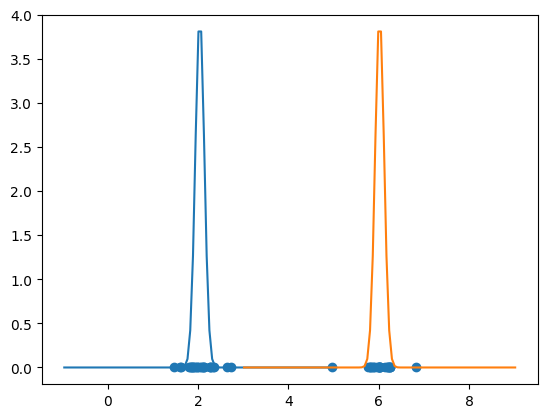

In [5319]:
import matplotlib.pyplot as plt
import seaborn as sns

abs = np.zeros(Y.size)
plt.scatter(Y,abs)
normal1 = stats.norm(loc = mean1, scale = vars[0])
normal2 = stats.norm(loc = mean2, scale = vars[1])

abs2 = np.linspace(mean1-3,mean1+3,100)
abs3 = np.linspace(mean2-3,mean2+3,100)

plt.plot(abs2,normal1.pdf(abs2))
plt.plot(abs3,normal2.pdf(abs3))

plt.show()



Méthode de gradient


Voici le code LaTeX correspondant à la fonction objectif :



Et voici le code LaTeX correspondant à la méthode de gradient :

\begin{equation*}
\begin{aligned}
\nu_i^{\theta} &\leftarrow \nu_i^{\theta} + \alpha \sum_{k=0}^n \omega_k^{\theta\prime}(i) \ \newline
\mu_i^{\theta} &\leftarrow \mu_i^{\theta} + \alpha \sum_{k=0}^n \frac{(y_k - \mu_i^{\theta})\omega_k^{\theta\prime}(i)}{v_i^{\theta}} \ \newline
v_i^{\theta} &\leftarrow v_i^{\theta} + \alpha \left(\sum_{k=0}^n \frac{\omega^{\theta\prime}_{k}(i)}{v_i^{\theta}} - \sum_{k=0}^n \frac{(y_k - \mu_i^{\theta})\omega_k^{\theta\prime}(i)}{(v_i^{\theta})^2}\right) \ \newline
q_{i j}^{\theta} &\leftarrow q_{i j}^{\theta} + \alpha \sum_{k=0}^{n-1} \omega_{k,k+1}^{\theta\prime}(i,j)
\end{aligned}
\end{equation*}

Note : Le symbole $\alpha$ représente le taux d'apprentissage (learning rate) de la méthode de gradient et $\omega^{\theta\prime}$ représente la distribution des variables latentes dans le modèle.



In [5320]:
def descente_gradient(Y,Q_init,nu_init,means_init,vars_init,nb_iters):
    n = Y.size
    r = nu_init.size 
    y = Y
    Q = Q_init
    nu = nu_init
    means = means_init
    vars = vars_init
    print(vars)
    for k in range(nb_iters): # mise à jour de la moyenne
        omega = omega_now(y,Q,nu,means,vars) 
        for i in range(r):
            means[i] = means[i] + 0.01 * np.sum( (y-means[i]) * omega[:,i] ) / (vars[i])
            print(means)

    for k in range(nb_iters): # mise à jour de la moyenne
        omega = omega_now(y,Q,nu,means,vars) 
        for i in range(r):
            vars[i] = vars[i] - 0.00001 * ( (np.sum(omega[:,i])) / (2*vars[i]) - np.sum( ((y-means[i]) * omega[:,i])**2 )  / (2 *(vars[i])**2))
            print(vars)


    return means,vars

means = np.array([2.,6.])
vars = np.array([0.1,0.1])
vars_init = np.array([3,1.5])
means_init = np.array([2.,15.])
descente_gradient(Y,Q,nu,means_init,vars,40)

[0.1 0.1]
[ 4.83152606 15.        ]
[4.83152606 0.26165045]
[7.48834916 0.26165045]
[7.48834916 4.66072912]
[5.89107725 4.66072912]
[ 5.89107725 -0.81694619]
[ 6.19652492 -0.81694619]
[6.19652492 6.60991948]
[-5.00205164  6.60991948]
[-5.00205164  6.17213595]
[11.76757874  6.17213595]
[11.76757874  5.10671435]
[11.27283359  5.10671435]
[11.27283359 -0.8513598 ]
[-1.33793393 -0.8513598 ]
[-1.33793393  6.66498129]
[7.4434999  6.66498129]
[7.4434999  5.11305929]
[6.69930498 5.11305929]
[ 6.69930498 -1.48782961]
[ 5.06500613 -1.48782961]
[5.06500613 7.68333299]
[-1.12697868  7.68333299]
[-1.12697868  7.04524924]
[7.10597149 7.04524924]
[7.10597149 4.58068417]
[5.28738088 4.58068417]
[ 5.28738088 -1.41801143]
[ 6.52361447 -1.41801143]
[6.52361447 6.75191606]
[-5.98213896  6.75191606]
[-5.98213896  6.1785285 ]
[13.1383591  6.1785285]
[13.1383591   5.09586978]
[12.50653593  5.09586978]
[12.50653593 -0.809066  ]
[-3.06511719 -0.809066  ]
[-3.06511719  6.59731122]
[10.20698662  6.59731122]
[10.

(array([6.7105273 , 6.76468867]), array([0.71753655, 0.10982907]))